# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型

In [3]:
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

In [4]:
mp_pose.Pose?

Init signature:
mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    enable_segmentation=False,
    smooth_segmentation=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
Docstring:     
MediaPipe Pose.

MediaPipe Pose processes an RGB image and returns pose landmarks on the most
prominent person detected.

Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
usage examples.
Init docstring:
Initializes a MediaPipe Pose object.

Args:
  static_image_mode: Whether to treat the input images as a batch of static
    and possibly unrelated images, or a video stream. See details in
    https://solutions.mediapipe.dev/pose#static_image_mode.
  model_complexity: Complexity of the pose landmark model: 0, 1 or 2. See
    details in https://solutions.mediapipe.dev/pose#model_complexity.
  smooth_landmarks: Whether to filter landmarks across different input
    images to reduce jitter. See details in
    h

In [12]:
# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


如果遇到报错`Stream "segmentation_mask" is not defined in the config`，是因为mediapipe版本过低，需在命令行中运行`!pip3 install mediapipe==0.8.7.4 opencv-python numpy --upgrade --user -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host mirrors.aliyun.com`（参考`【A】运行代码之前先运行-安装配置工具包.ipynb`）

# 读入图像

In [13]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')

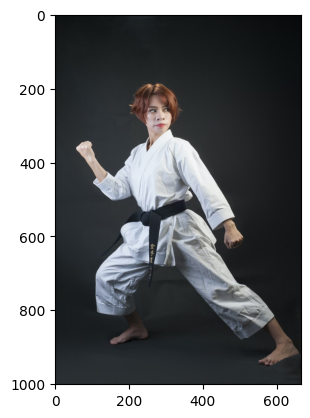

In [14]:
look_img(img)

# 将图像输入模型，获取预测结果

In [15]:
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

# 可视化检测结果

In [17]:
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

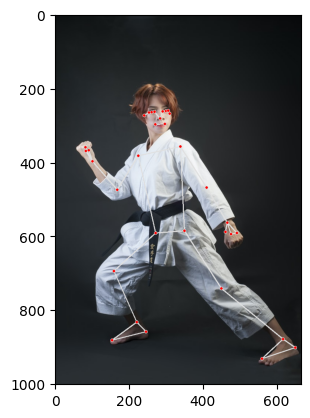

In [18]:
look_img(img)

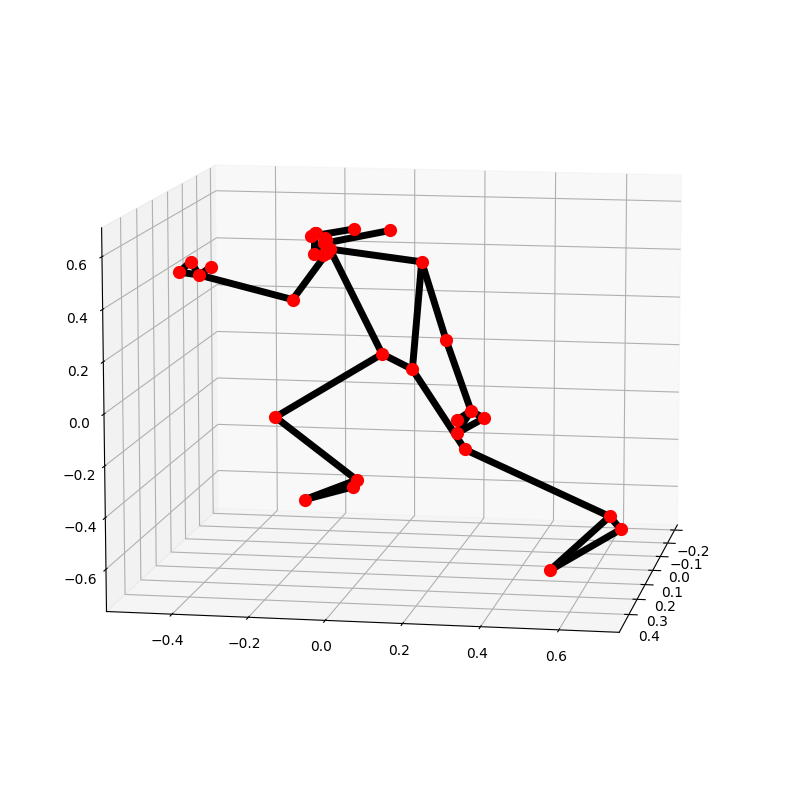

In [19]:
# 在三维真实物理坐标系中可视化以米为单位的检测结果
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# 整理代码

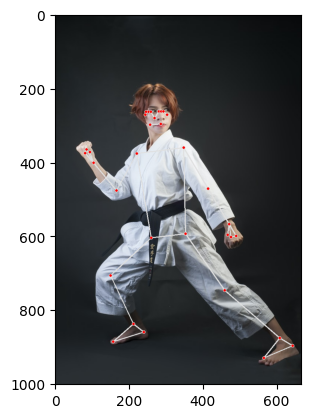

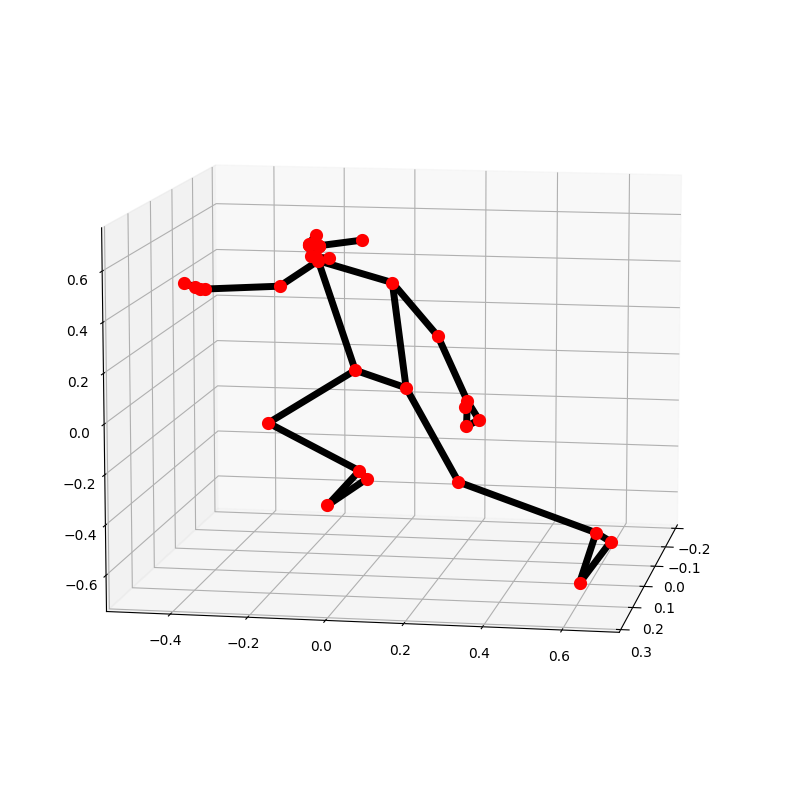

In [20]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
# 进度条库
from tqdm import tqdm
# 时间库
import time
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=1,            # 选择人体姿态关键点检测模型，0最快但性能差，2性能好但是慢
                    smooth_landmarks=True,         # 是否平滑关键点
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

# 可视化
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
look_img(img)
# 在三维真实物理坐标系中可视化以米为单位的检测结果
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# 整理代码

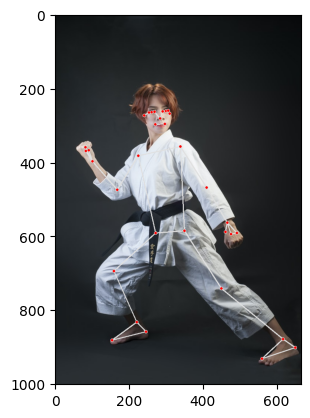

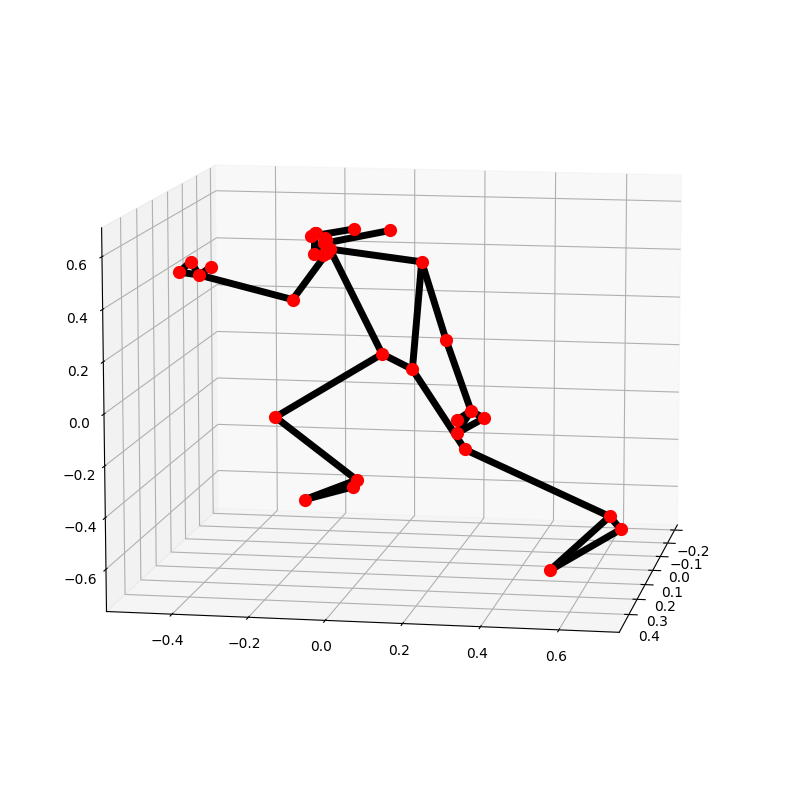

In [21]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 导入solution
mp_pose = mp.solutions.pose

# # 导入绘图函数
mp_drawing = mp.solutions.drawing_utils 

# 导入模型
pose = mp_pose.Pose(static_image_mode=True,        # 是静态图片还是连续视频帧
                    model_complexity=2,            # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,         # 是否平滑关键点
                    enable_segmentation=True,      # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)   # 追踪阈值

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('person1.jfif')

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)

# 可视化
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
look_img(img)
# 在三维真实物理坐标系中可视化以米为单位的检测结果
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)